## Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

## Loading the dataset.

In [2]:
df = pd.read_csv("Walmart DataSet 2.csv")

In [3]:
df.info() #Getting an overview (columns, shape, and datatypes) of the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.head(5).T

,0,1,2,3,4
Store,1,1,1,1,1
Date,05-02-2010,12-02-2010,19-02-2010,26-02-2010,05-03-2010
Weekly_Sales,1643690.9,1641957.44,1611968.17,1409727.59,1554806.68
Holiday_Flag,0,1,0,0,0
Temperature,42.31,38.51,39.93,46.63,46.5
Fuel_Price,2.572,2.548,2.514,2.561,2.625
CPI,211.096358,211.24217,211.289143,211.319643,211.350143
Unemployment,8.106,8.106,8.106,8.106,8.106


In [6]:
df.tail(5).T

,6430,6431,6432,6433,6434
Store,45,45,45,45,45
Date,28-09-2012,05-10-2012,12-10-2012,19-10-2012,26-10-2012
Weekly_Sales,713173.95,733455.07,734464.36,718125.53,760281.43
Holiday_Flag,0,0,0,0,0
Temperature,64.88,64.89,54.47,56.47,58.85
Fuel_Price,3.997,3.985,4.0,3.969,3.882
CPI,192.013558,192.170412,192.327265,192.330854,192.308899
Unemployment,8.684,8.667,8.667,8.667,8.667


In [7]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
df['Store'].nunique() #Total number of stores. 

45

In [9]:
df['Date'].nunique() #Total number of weeks. 

143

In [10]:
df.isnull().sum() # Checking for missing values.  

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There are no missing values. 

In [11]:
df.duplicated().sum() #Checking for duplicate values. 

0

#### There are no duplicate values. 

In [12]:
df.describe() #Getting the statistical overview. 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Data Pre-processing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


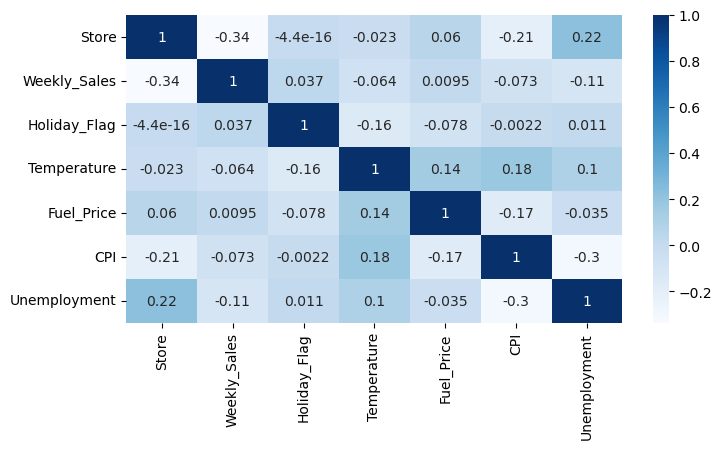

In [14]:
plt.subplots(figsize=(8,4))

sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

plt.show()

## EDA

## Checking the store-wise weekly sales.

In [15]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [16]:
df_store_sales

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


### Visualizing the store-wise weekly sales for a better understanding.  

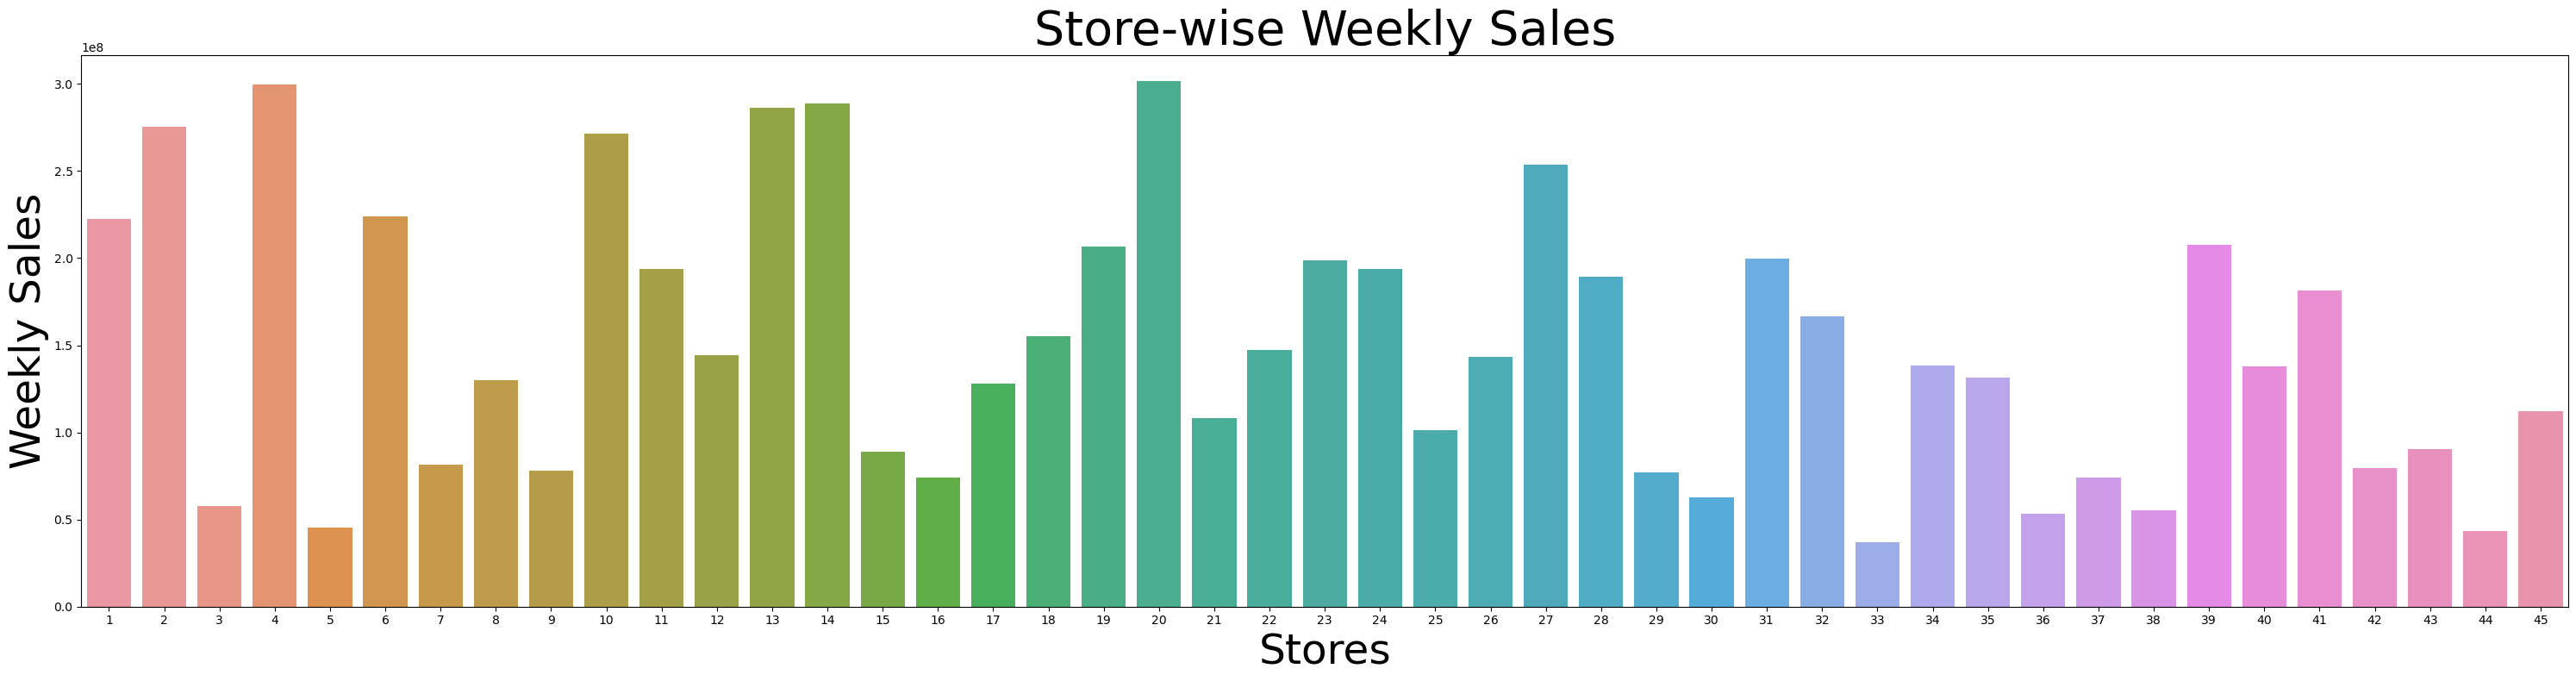

In [17]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store-wise Weekly Sales',fontsize=40)
plt.xlabel('Stores',fontsize=35)
plt.ylabel('Weekly Sales',fontsize=35)
plt.tight_layout()
plt.show()

## Checking the top 10 performing stores with highest weekly sales.

In [18]:
top_10_stores = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)

In [19]:
top_10_stores

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


### Visualizing the above findings. 

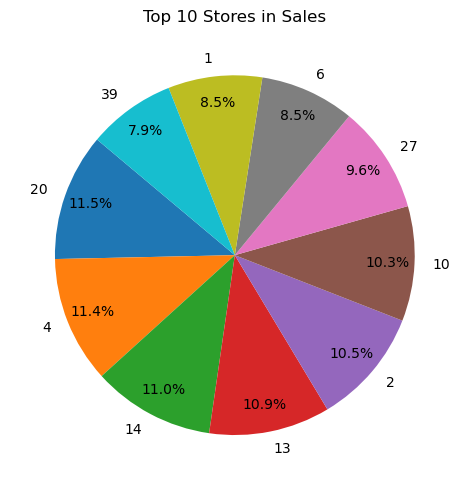

In [20]:
stores = top_10_stores['Store']
sales = top_10_stores['Weekly_Sales']
plt.figure(figsize=(15, 5))  
plt.pie(sales, labels=stores, autopct='%1.1f%%', startangle=140, pctdistance = 0.85)
plt.title('Top 10 Stores in Sales') 
plt.tight_layout()  
plt.show() 

### As per the above piechart, stores 20,4, and 14 are the top 3 stores in the top 10 stores segment. 

### Now, let's look at the bottom stores with the lowest weekly sales. 

In [21]:
last_ten_stores = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
last_ten_stores 

,Store,Weekly_Sales
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32
15,16,74252425.40
28,29,77141554.31


### Visualizing the above data.

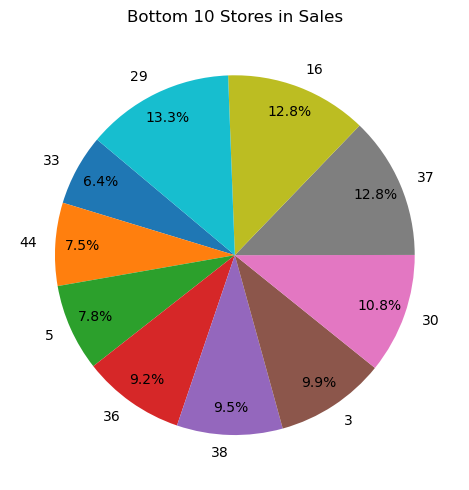

In [22]:
stores = last_ten_stores['Store']
sales = last_ten_stores['Weekly_Sales']

# Create a pie chart
plt.figure(figsize=(15, 5))  
plt.pie(sales, labels=stores, autopct='%1.1f%%', startangle=140, pctdistance = 0.85)
plt.title('Bottom 10 Stores in Sales') 
plt.tight_layout()  
plt.show()  

### As per the above pie chart, store no. 33, 44, and 5 are the worst performing stores in the bottom 10 stores segment. 


### Now, let's look at the difference in weekly sales of the between the best and the worst performing store.

In [23]:
df_top_store = df_store_sales.loc[df_store_sales['Weekly_Sales'].idxmax()] #sorting the top and bottom stores in terms of performance.
df_bottom_store = df_store_sales.loc[df_store_sales['Weekly_Sales'].idxmin()]

In [24]:
difference_in_sales = df_top_store['Weekly_Sales'] - df_bottom_store['Weekly_Sales']

In [25]:
print("Worst Performing Store in the Dataset:", int(df_bottom_store['Store']))
print("Best Performing Store in the Dataset:", int(df_top_store['Store']))
print("Difference in Sales Between the Best and the Worst Performing Stores:", difference_in_sales)
print()

Worst Performing Store in the Dataset: 33
Best Performing Store in the Dataset: 20
Difference in Sales Between the Best and the Worst Performing Stores: 264237570.49999997



### Plotting the above findings. 

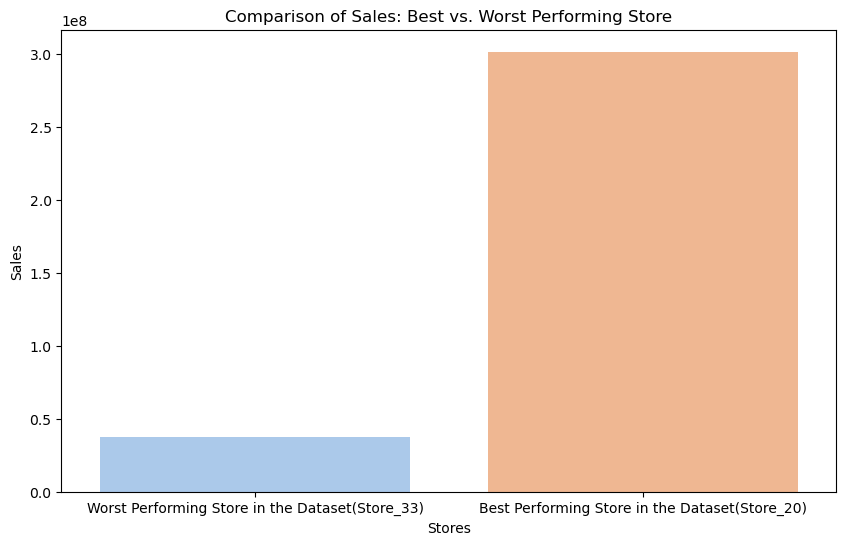

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x= ['Worst Performing Store in the Dataset(Store_33)', 'Best Performing Store in the Dataset(Store_20)'], y=[df_bottom_store['Weekly_Sales'], df_top_store['Weekly_Sales']], palette='pastel')
plt.title("Comparison of Sales: Best vs. Worst Performing Store")
plt.xlabel("Stores")
plt.ylabel("Sales")
plt.show()
     

## Exploring the relationship between sales and different columns/features:

### Fuel Prices & Weekly Sales

In [27]:
df["Fuel_Price"].min()

2.472

In [28]:
df["Fuel_Price"].min()

2.472

In [29]:
df["Fuel_Price"].nunique()

892

In [30]:
df["Fuel_Price"].value_counts()

3.638    39
3.630    34
2.771    29
3.891    29
3.524    28
         ..
2.863     1
2.995     1
3.053     1
3.448     1
3.576     1
Name: Fuel_Price, Length: 892, dtype: int64

#### Let's categorize the column to find out how the stores perform with the change in the fuel price. 

In [31]:
bins1 = [2,2.5,3,3.5,4,4.5] 
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [32]:
df['Fuel_Price_Stores']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)

In [33]:
df['Fuel_Price_Stores'].value_counts().sum()

6435

In [34]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Stores')['Weekly_Sales'].sum().reset_index()

In [35]:
df_Fuel_Price_Sales

,Fuel_Price_Stores,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.948480e+09
2,3.1-3.5,1.629321e+09
3,3.6-4,2.739146e+09
4,4.1-4.5,4.198009e+08


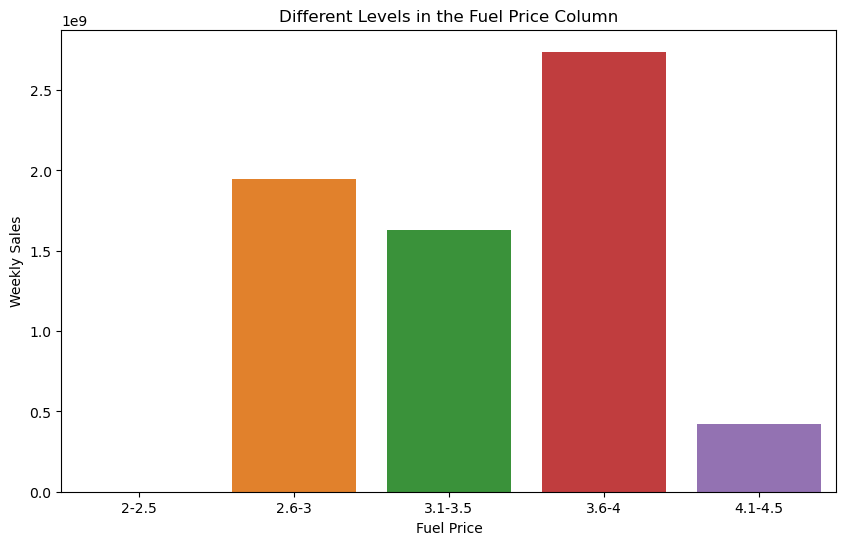

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Price_Stores',y='Weekly_Sales',data=df_Fuel_Price_Sales)
plt.title("Different Levels in the Fuel Price Column")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

### Unemployment & Weekly Sales

In [37]:
df['Unemployment'].min()

3.879

In [38]:
df['Unemployment'].max()

14.313

In [39]:
bins2=[4,6,8,10,12] 
labels2=['4-6','6.1-8','8.1-10','10.1-12']

In [40]:
df['Unemployment_Stores']= pd.cut(df['Unemployment'],bins=bins2,labels=labels2)

In [41]:
df["Unemployment_Stores"].value_counts()

6.1-8      2795
8.1-10     2389
4-6         618
10.1-12     290
Name: Unemployment_Stores, dtype: int64

In [42]:
df_Unemployment_Sales = df.groupby('Unemployment_Stores')['Weekly_Sales'].sum().reset_index()

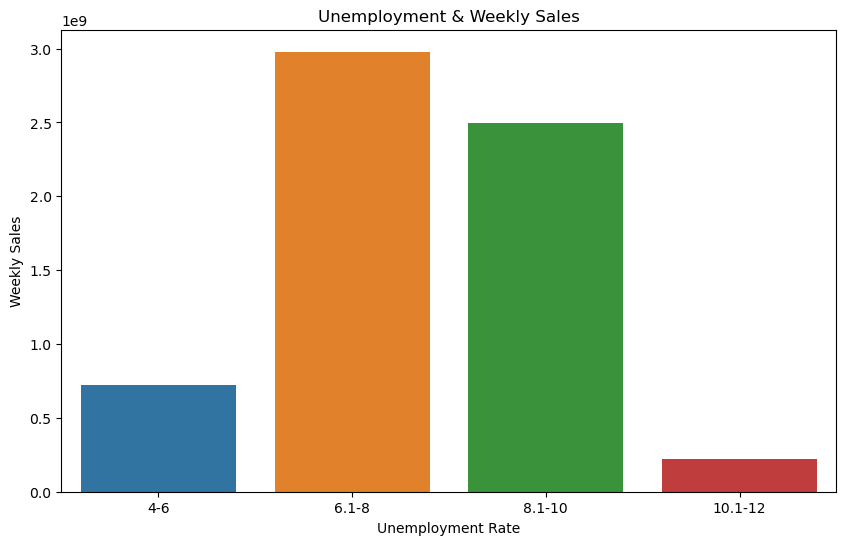

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment_Stores',y='Weekly_Sales',data=df_Unemployment_Sales)
plt.title("Unemployment & Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

## Relationship between CPI (Consumer Price Index) & Weekly Sales

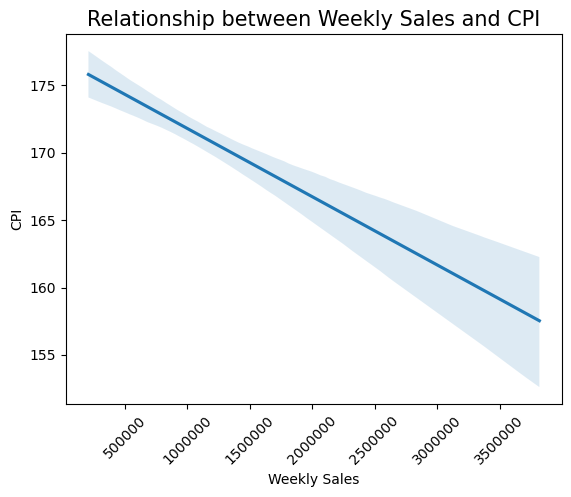

In [117]:
sns.regplot(df,x='Weekly_Sales',y = 'CPI',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation = 45)
plt.title("Relationship between Weekly Sales and CPI",fontsize = 15)
plt.xlabel("Weekly Sales")
plt.show()

## Checking the stationarity of the data. 

In [118]:
from statsmodels.tsa.stattools import adfuller  #To perform an augmented Dickey-Fuller test

store_seasonality = [] #Initializing an empty list to store the seasonality check results for each store

for store in range(1,46):
  store_data = df[df['Store']==store]
  result = adfuller(store_data['Weekly_Sales']) #Performing the Augmented Dickey-Fuller (ADF) test on the 'Weekly_Sales' column
  adf_statistic = result[0]
  p_value = result[1]
  store_seasonality.append({'store_no.':store, 'adf_statistics':adf_statistic, 'p-value' : p_value })

for result in store_seasonality:
    store = result['store_no.']
    adf_statistic = result['adf_statistics']
    p_value = result['p-value']

    print(f"store_no. {store}:")
    print("adf_statistics:", adf_statistic)
    print("p-value:", p_value)
    if p_value < 0.05: #Interpreting the p-value to determine if the time series is stationary
        print("The time series is likely stationary (no seasonality).")
    else:
        print("The time series may not be stationary (may have seasonality).")
    print()

store_no. 1:
adf_statistics: -5.102186145192288
p-value: 1.3877788330759434e-05
The time series is likely stationary (no seasonality).

store_no. 2:
adf_statistics: -3.7088625726189153
p-value: 0.003990207089066268
The time series is likely stationary (no seasonality).

store_no. 3:
adf_statistics: -2.9638677455113234
p-value: 0.03840926179831252
The time series is likely stationary (no seasonality).

store_no. 4:
adf_statistics: -2.879381984014713
p-value: 0.04779866223669829
The time series is likely stationary (no seasonality).

store_no. 5:
adf_statistics: -4.310974424060915
p-value: 0.00042517056141923293
The time series is likely stationary (no seasonality).

store_no. 6:
adf_statistics: -5.492502135779502
p-value: 2.1594858682169855e-06
The time series is likely stationary (no seasonality).

store_no. 7:
adf_statistics: -4.476254338547256
p-value: 0.0002170071890711761
The time series is likely stationary (no seasonality).

store_no. 8:
adf_statistics: -5.647652940025235
p-value

## Checking the sum of the overall weekly sales for the stores. 

In [44]:
df1= df[['Date','Weekly_Sales']]
df1 = pd.DataFrame(df1.groupby('Date')['Weekly_Sales'].sum().reset_index())
df1

,Date,Weekly_Sales
0,01-04-2011,43458991.19
1,01-06-2012,48281649.72
2,01-07-2011,47578519.50
3,01-10-2010,42239875.87
4,02-03-2012,46861034.97
...,...,...
138,30-07-2010,44630363.42
139,30-09-2011,42195830.81
140,30-12-2011,46042461.04
141,31-08-2012,47159639.43


In [45]:

df_new = df1.copy()
df_new.columns = ['Date', 'Weekly_Sales']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [46]:

df_new['Date'] = pd.to_datetime(df_new['Date'], dayfirst = True)

In [53]:
df_new.columns

Index(['Date', 'Weekly_Sales'], dtype='object')



Seasonal Decomposition for Overall Sales Per Week for Store Number 1


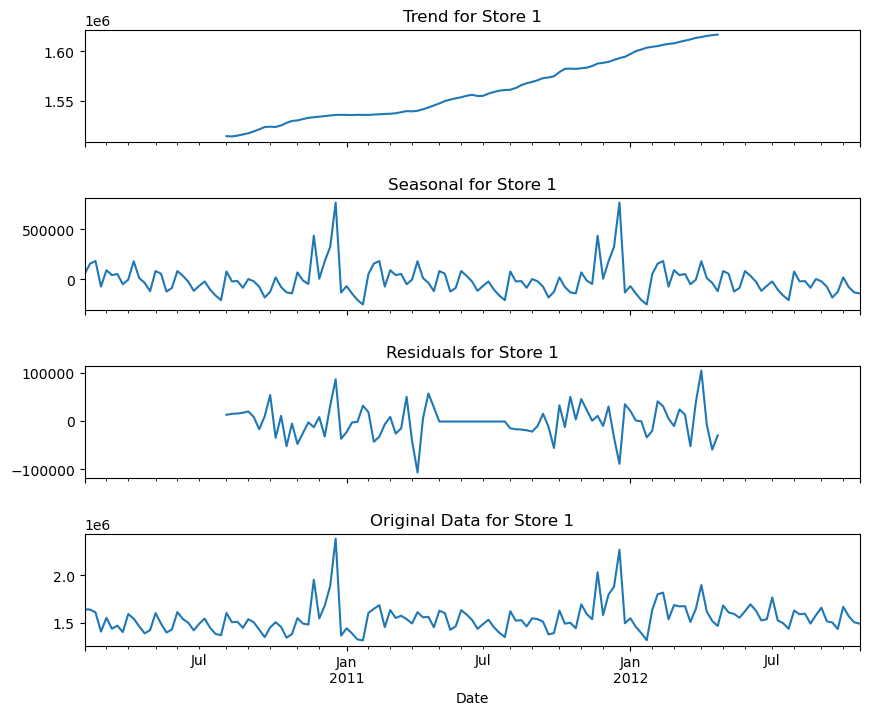



Seasonal Decomposition for Overall Sales Per Week for Store Number 2


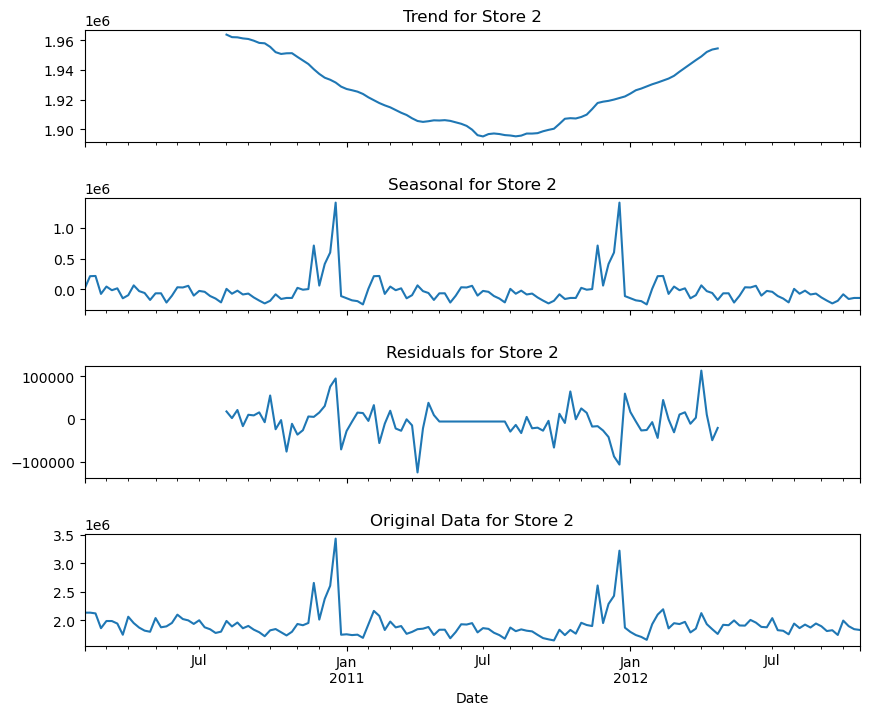



Seasonal Decomposition for Overall Sales Per Week for Store Number 3


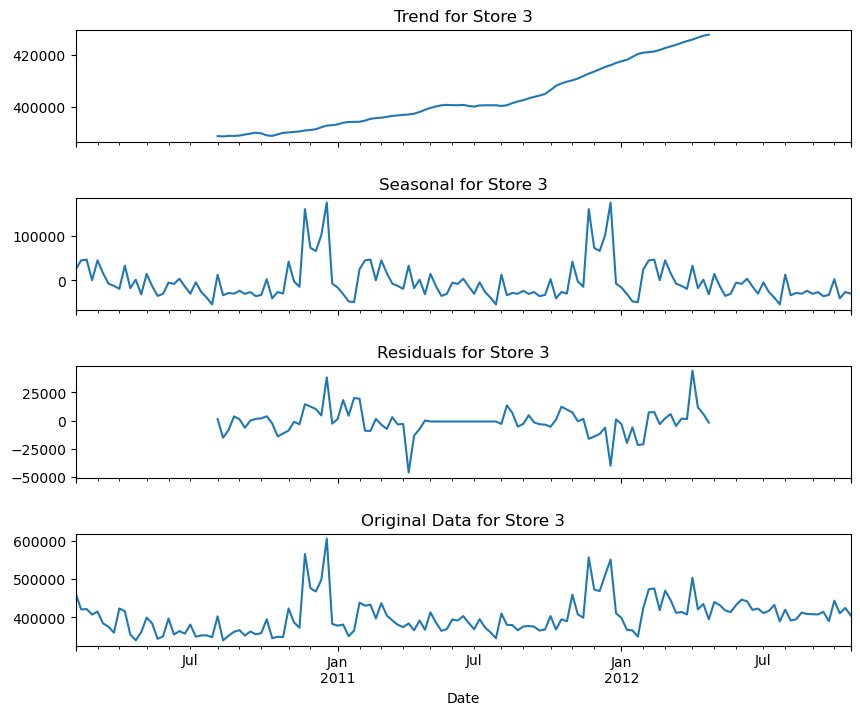



Seasonal Decomposition for Overall Sales Per Week for Store Number 4


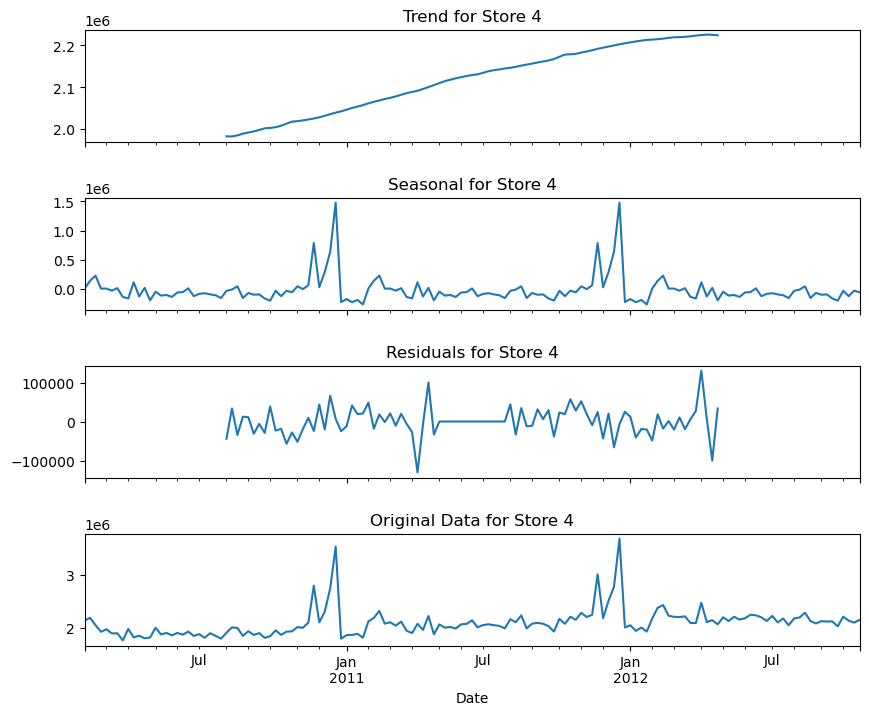



Seasonal Decomposition for Overall Sales Per Week for Store Number 5


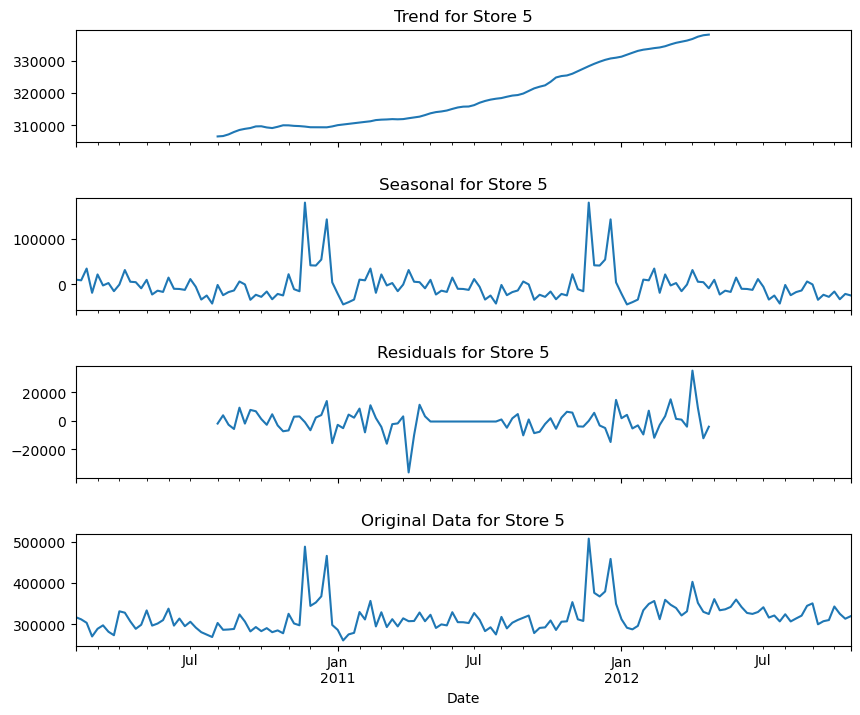



Seasonal Decomposition for Overall Sales Per Week for Store Number 6


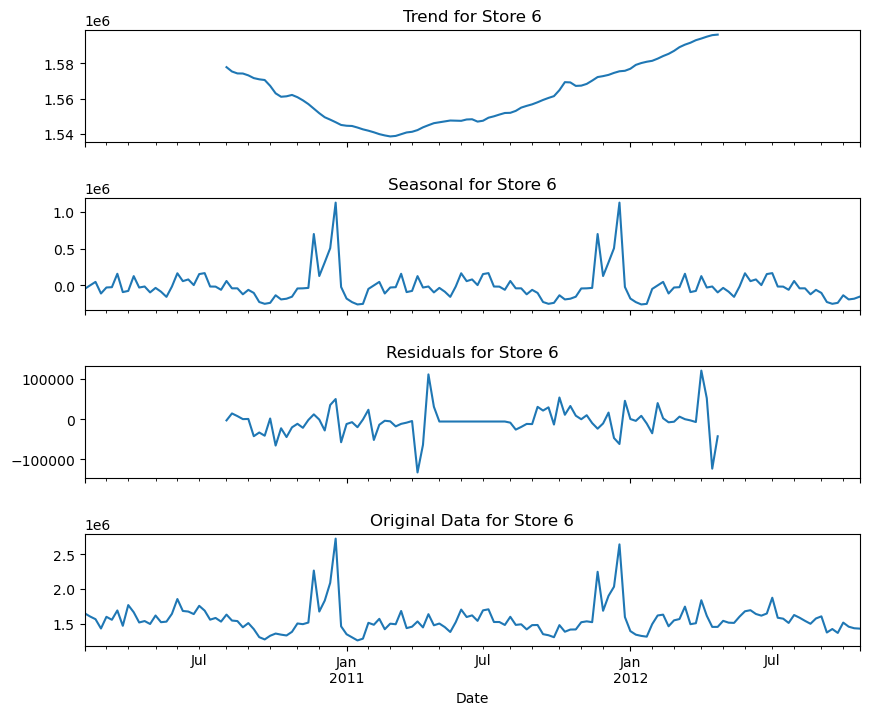



Seasonal Decomposition for Overall Sales Per Week for Store Number 7


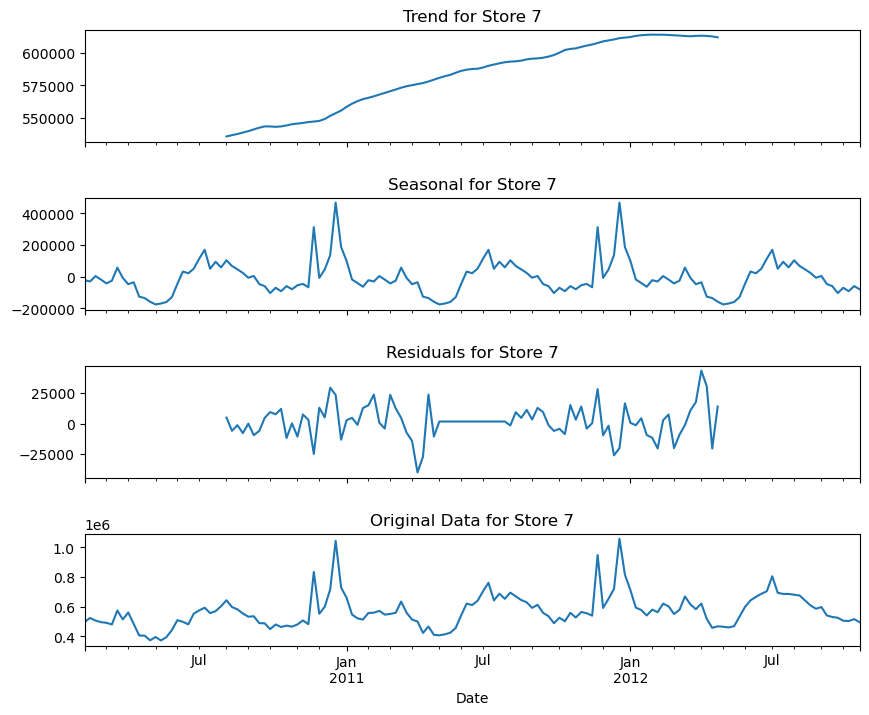



Seasonal Decomposition for Overall Sales Per Week for Store Number 8


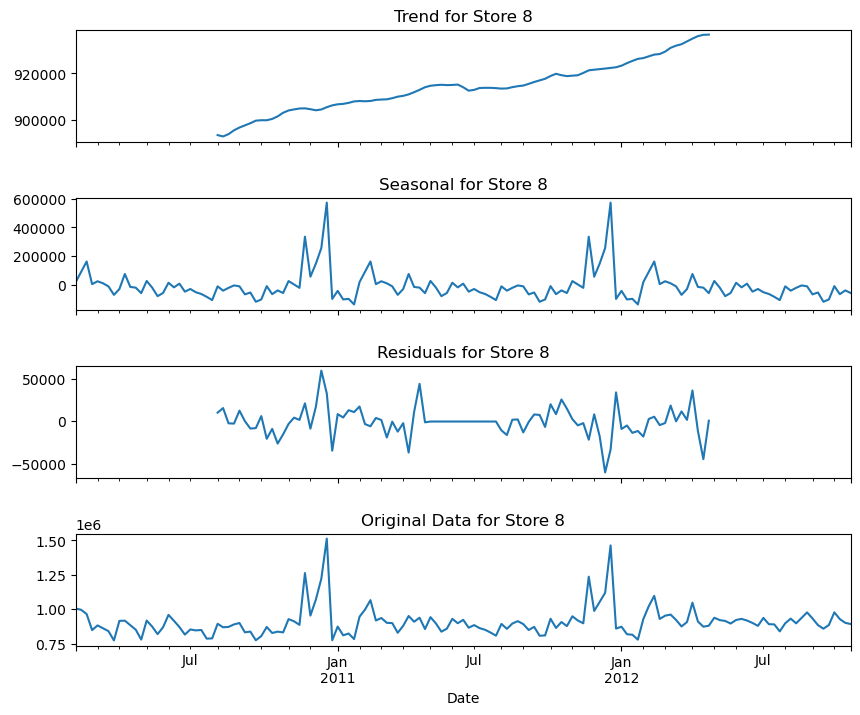



Seasonal Decomposition for Overall Sales Per Week for Store Number 9


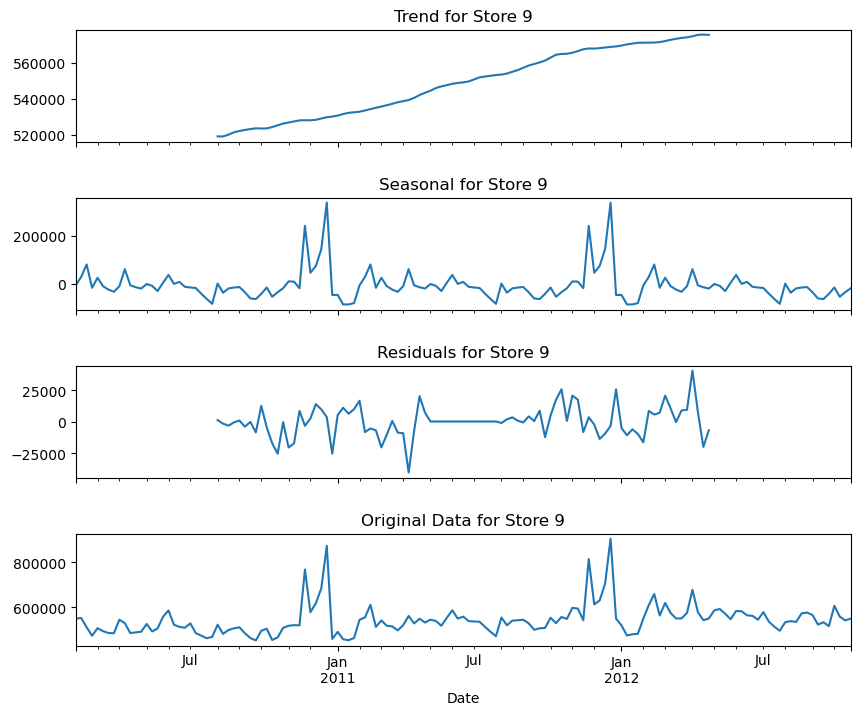

In [54]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


for i in range(1, 10):
    df1 = df[df['Store'] == i]
    df1 = pd.DataFrame(df1.groupby('Date')['Weekly_Sales'].sum().reset_index())
    df_all = df1.copy()
    df_all.columns = ['Date', 'Weekly_Sales']
    df_all['Date'] = pd.to_datetime(df_all['Date'], dayfirst=True)
    df_all = df_all.sort_values(by='Date')
    fig = px.line(df_all, x="Date", y="Weekly_Sales", title=f"Distribution of Overall Sales Per Week for Store Number {i}")
    fig.show()

    print('')
    print('')
    print(f"Seasonal Decomposition for Overall Sales Per Week for Store Number {i}")
    df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
    df1 = df1.sort_values(by='Date')
    df1 = df1.set_index(['Date'])

    all_store_seasonality = seasonal_decompose(df1['Weekly_Sales'].dropna(), period=52)  # Set period=52 for weekly data

    # Create a figure with subplots to control spacing
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=0.5)

    all_store_seasonality.trend.plot(ax=axes[0])
    axes[0].set_title(f'Trend for Store {i}')

    all_store_seasonality.seasonal.plot(ax=axes[1])
    axes[1].set_title(f'Seasonal for Store {i}')

    all_store_seasonality.resid.plot(ax=axes[2])
    axes[2].set_title(f'Residuals for Store {i}')

    axes[3].set_title(f'Original Data for Store {i}')
    df1['Weekly_Sales'].plot(ax=axes[3])

    plt.show()

     

## Now, that we have the seasonal decomposition, let's start building the model. 

In [55]:
df_model = df[['Store','Date','Weekly_Sales']]
df_model

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
...,...,...,...
6430,45,28-09-2012,713173.95
6431,45,05-10-2012,733455.07
6432,45,12-10-2012,734464.36
6433,45,19-10-2012,718125.53


In [56]:
df_model['Date'] = pd.to_datetime(df_model['Date'], dayfirst = True)
df_model.set_index('Date', inplace= True)
df_model

,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68
...,...,...
2012-09-28,45,713173.95
2012-10-05,45,733455.07
2012-10-12,45,734464.36


In [58]:
Store15 = df_model[df_model['Store']==15]
Store15

,Store,Weekly_Sales
Date,,
2010-02-05,15,652122.44
2010-02-12,15,682447.10
2010-02-19,15,660838.75
2010-02-26,15,564883.20
2010-03-05,15,605325.43
...,...,...
2012-09-28,15,553901.97
2012-10-05,15,573498.64
2012-10-12,15,551799.63


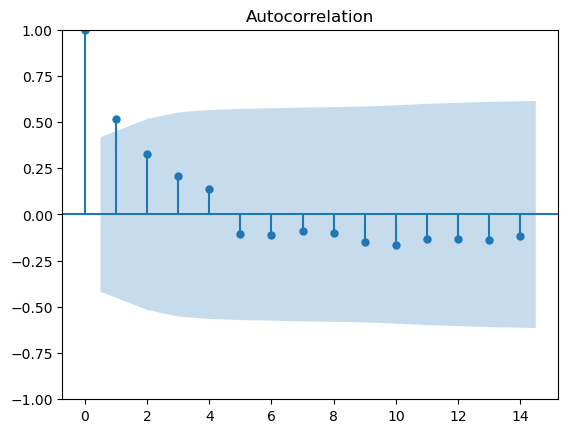

In [60]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Acf_Plot = acf(Store15['Weekly_Sales'].dropna())
plot_acf(Acf_Plot);

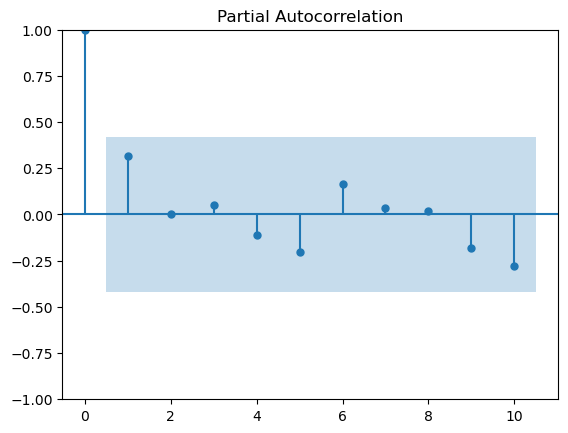

In [63]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

Pacf_Plot = pacf(Store15['Weekly_Sales'].dropna())
plot_pacf(Pacf_Plot , lags =10);
     

In [65]:
train15 = Store15.iloc[:120]['Weekly_Sales']
test15 = Store15.iloc[120:]['Weekly_Sales']

test15

Date
2012-05-25    693780.42
2012-06-01    663971.26
2012-06-08    611390.67
2012-06-15    636737.65
2012-06-22    687085.60
2012-06-29    624099.48
2012-07-06    678024.75
2012-07-13    591335.50
2012-07-20    592369.22
2012-07-27    571190.83
2012-08-03    590739.62
2012-08-10    590453.63
2012-08-17    579738.20
2012-08-24    606210.77
2012-08-31    610185.32
2012-09-07    587259.82
2012-09-14    527509.76
2012-09-21    533161.64
2012-09-28    553901.97
2012-10-05    573498.64
2012-10-12    551799.63
2012-10-19    555652.77
2012-10-26    558473.60
Name: Weekly_Sales, dtype: float64

In [66]:
from statsmodels.tsa.arima.model import ARIMA #Importing the necessary library.

In [67]:
model1 = ARIMA(train15 ,order = (1,0,4))
model_fit = model1.fit()

/Users/somyaojha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/Users/somyaojha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/Users/somyaojha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

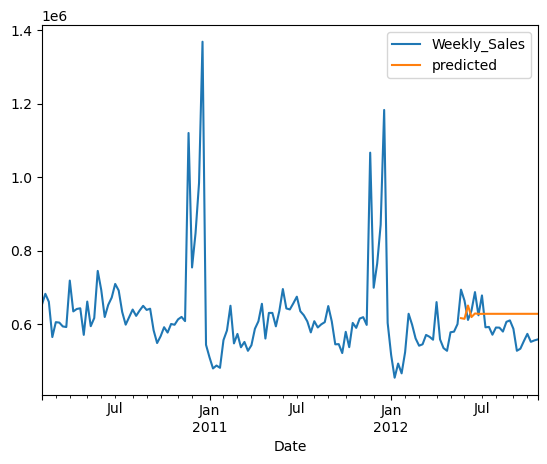

In [73]:
new_data = len(train15)
end = len(train15) + len(test15) - 1
Store15['predicted'] = model_fit.predict(start=new_data,end=end, dynamic=True)
Store15[['Weekly_Sales','predicted']].plot()

In [74]:

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

# Align the predicted values with the test data
predicted_values = Store15['predicted'][-len(test15):]

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test15, predicted_values)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test15, predicted_values)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2 = r2_score(test15, predicted_values)

print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared (R2) Score: -0.49
Mean Absolute Error (MAE): 50908.04
Mean Squared Error (MSE): 3179038765.63
Root Mean Squared Error (RMSE): 56382.97


## Using Facebook Prophet to forecast the sales.

In [75]:
from prophet import Prophet


In [76]:
Store_15 = df[df['Store']==15][['Date','Weekly_Sales']]
Store_15['Date'] = pd.to_datetime(Store_15['Date'],dayfirst = True)
Store_15


,Date,Weekly_Sales
2002,2010-02-05,652122.44
2003,2010-02-12,682447.10
2004,2010-02-19,660838.75
2005,2010-02-26,564883.20
2006,2010-03-05,605325.43
...,...,...
2140,2012-09-28,553901.97
2141,2012-10-05,573498.64
2142,2012-10-12,551799.63
2143,2012-10-19,555652.77


In [99]:
Store_15 = Store_15.rename(columns ={'Date':'ds','Weekly_Sales':'y'})
Store_15

,ds,y
2002,2010-02-05,652122.44
2003,2010-02-12,682447.10
2004,2010-02-19,660838.75
2005,2010-02-26,564883.20
2006,2010-03-05,605325.43
...,...,...
2140,2012-09-28,553901.97
2141,2012-10-05,573498.64
2142,2012-10-12,551799.63
2143,2012-10-19,555652.77


In [100]:
Store_15.columns

Index(['ds', 'y'], dtype='object')

In [91]:
model_prophet = Prophet( seasonality_prior_scale=50,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.10,
    yearly_seasonality=25,
    growth='linear',
    interval_width=0.95,)
model_prophet.fit(Store_15)

19:00:57 - cmdstanpy - INFO - Chain [1] start processing
19:00:58 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
forecast = model_prophet.make_future_dataframe(periods=12, freq='W')

In [93]:
forecast_sales = model_prophet.predict(forecast)

In [94]:
forecast_store15 = forecast_sales[['ds','yhat_lower','yhat_upper','yhat']]

In [95]:
forecasted_values= forecast_store15.tail(12)[['ds','yhat']]
forecasted_values['yhat']=forecasted_values['yhat'].astype(int)
forecasted_values

,ds,yhat
143,2012-10-28,536674
144,2012-11-04,620685
145,2012-11-11,569864
146,2012-11-18,615622
147,2012-11-25,1044677
148,2012-12-02,726482
149,2012-12-09,766196
150,2012-12-16,932843
151,2012-12-23,1231435
152,2012-12-30,576095


In [96]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_prophet, forecast_sales)

In [102]:
Store_15.columns

Index(['ds', 'y'], dtype='object')

In [119]:
predicted_value=forecast_store15.iloc[0:143]['yhat']

actual_value= Store_15['y'] #Actual value.

from sklearn.metrics import r2_score , mean_absolute_error #Scoring.

print('R2_score of the model is',r2_score(actual_value, predicted_value)) #R2_score of the model.

#Mean Absolute Percentage Error (MAPE).
mape = np.mean(np.abs(np.array(actual_value) - np.array(predicted_value)) / np.array(actual_value)) * 100
print(f'Mean Absolute Percentage Error (MAPE) is {mape}')

#Mean Absolute Error (MAE).
print(f'Mean Absolute error is {mean_absolute_error(actual_value, predicted_value)}')

R2_score of the model is 0.9387964630665365
Mean Absolute Percentage Error (MAPE) is 3.49803880230234
Mean Absolute error is 21970.742057913067


In [105]:
def forecast_sales(store_number, df):
    try:
        # Filter the DataFrame for the specific store
        df_for_forecast = df[df['Store'] == store_number][['Date', 'Weekly_Sales']]
        
        # Convert the 'date' column to datetime
        df_for_forecast['Date'] = pd.to_datetime(df_for_forecast['Date'], dayfirst=True)
        
        # Rename columns for Prophet compatibility
        df_for_forecast = df_for_forecast.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
        
        # Initialize and fit the Prophet model
        model = Prophet(
            seasonality_prior_scale=50,
            holidays_prior_scale=10.0,
            changepoint_prior_scale=0.10,
            yearly_seasonality=25,
            growth='linear',
            interval_width=0.95
        )
        model.fit(df_for_forecast)
        
        # Create a DataFrame for future dates (next 12 weeks)
        future = model.make_future_dataframe(periods=12, freq='W')
        
        # Predict future sales
        forecast = model.predict(future)
        
        # Extract relevant forecasted values
        forecast_store_number = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
        
        # Forecasted Values for the next 12 weeks
        forecasted_values = forecast_store_number.tail(12)[['ds', 'yhat']]
        forecasted_values['yhat'] = forecasted_values['yhat'].astype(int)
        
        # Print the forecasted values
        print(forecasted_values)
        print("\n\n")
        
        # Plot the forecast
        return plot_plotly(model, forecast)
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage with store number 37
# Ensure 'df' is your DataFrame containing the relevant data
forecast_sales(40, df)

19:24:37 - cmdstanpy - INFO - Chain [1] start processing
19:24:37 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat
143 2012-10-28   900615
144 2012-11-04  1051169
145 2012-11-11   984246
146 2012-11-18   939440
147 2012-11-25  1200395
148 2012-12-02  1083810
149 2012-12-09  1137985
150 2012-12-16  1248479
151 2012-12-23  1620660
152 2012-12-30   911321
153 2013-01-06   925136
154 2013-01-13   823980





In [108]:
def forecast_sales(store_number):
  df_for_forecast = df[df['Store']==store_number][['Date','Weekly_Sales']]
  df_for_forecast['Date'] = pd.to_datetime(df_for_forecast['Date'],dayfirst = True)

  #renaming the columns
  df_for_forecast = df_for_forecast.rename(columns ={'Date':'ds','Weekly_Sales':'y'})

  #giving the df to the model
  model_new = Prophet( seasonality_prior_scale=50,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.10,
    yearly_seasonality=25,
    growth='linear',
    interval_width=0.95,)
  model_new.fit(df_for_forecast)

  #predicting the future 12 weeks
  future = model_new.make_future_dataframe(periods=12, freq='W')

  forecast = model_new.predict(future)

  forecast_store_number = forecast[['ds','yhat_lower','yhat_upper','yhat']]

  #Forecasted Values for 12 weeks.

  forecasted_values= forecast_store_number.tail(12)[['ds','yhat']]
  forecasted_values['yhat']=forecasted_values['yhat'].astype(int)
  print(forecasted_values)

  print()
  print()
  #representation of the values using graph.

  from prophet.plot import plot_plotly, plot_components_plotly
  return plot_plotly(model_new, forecast)



#lets do the forecasting for store 37

forecast_sales(37)


19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing


            ds    yhat
143 2012-10-28  530905
144 2012-11-04  564974
145 2012-11-11  521602
146 2012-11-18  543578
147 2012-11-25  532037
148 2012-12-02  539731
149 2012-12-09  535025
150 2012-12-16  557263
151 2012-12-23  601837
152 2012-12-30  476169
153 2013-01-06  567021
154 2013-01-13  555499




In [111]:
forecast_sales(45)

19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat
143 2012-10-28   725404
144 2012-11-04   824697
145 2012-11-11   753689
146 2012-11-18   779601
147 2012-11-25  1142299
148 2012-12-02   896226
149 2012-12-09   951958
150 2012-12-16  1124826
151 2012-12-23  1569478
152 2012-12-30   790192
153 2013-01-06   659556
154 2013-01-13   682509




In [112]:
forecast_sales(1)

19:34:27 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat
143 2012-10-28  1459000
144 2012-11-04  1745052
145 2012-11-11  1569900
146 2012-11-18  1639837
147 2012-11-25  2020870
148 2012-12-02  1678873
149 2012-12-09  1779422
150 2012-12-16  1994425
151 2012-12-23  2357465
152 2012-12-30  1538114
153 2013-01-06  1531261
154 2013-01-13  1523635




In [113]:
forecast_sales(25)

19:34:34 - cmdstanpy - INFO - Chain [1] start processing
19:34:34 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat
143 2012-10-28   691900
144 2012-11-04   756342
145 2012-11-11   721243
146 2012-11-18   780394
147 2012-11-25  1122670
148 2012-12-02   928761
149 2012-12-09   951757
150 2012-12-16  1080462
151 2012-12-23  1300928
152 2012-12-30   698731
153 2013-01-06   616449
154 2013-01-13   639335


